Importing the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mt
import sklearn as sk

In [2]:
TFdataset=pd.read_csv("TaxiFare.csv")
TFdataset.head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [3]:
TFdataset.shape

(50000, 8)

In [4]:
TFdataset.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [5]:
TFdataset.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [6]:
TFdataset["date_time_of_pickup"].value_counts(10)

2014-05-30 23:38:00 UTC    0.00006
2011-09-03 01:30:00 UTC    0.00006
2012-06-28 20:54:00 UTC    0.00006
2011-02-11 13:19:00 UTC    0.00006
2013-07-18 18:14:00 UTC    0.00004
                            ...   
2012-07-17 17:11:16 UTC    0.00002
2010-11-24 12:46:52 UTC    0.00002
2009-08-02 14:46:14 UTC    0.00002
2013-08-16 23:29:00 UTC    0.00002
2012-09-12 11:37:00 UTC    0.00002
Name: date_time_of_pickup, Length: 49555, dtype: float64

Histogram of each numerical attributes

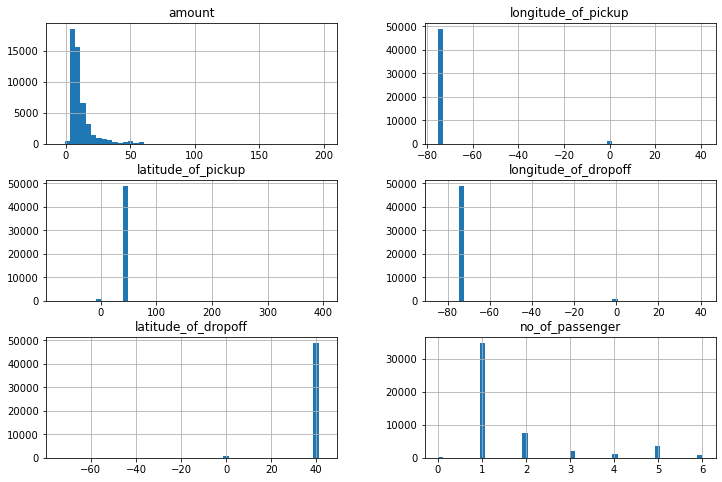

In [7]:
TFdataset.hist(bins=50,figsize=(12,8))
plt.show()

In [8]:
TFdataset_rindxed=TFdataset.set_index("unique_id")
TFdataset_rindxed.head(10)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
unique_id,,,,,,,
26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
10:00.0,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1


In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set= train_test_split(TFdataset_rindxed,test_size=0.2,random_state=42)

In [10]:
train_set.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
unique_id,,,,,,,
04:00.0,10.0,2013-07-27 17:04:00 UTC,-73.974332,40.791427,-73.979032,40.766365,5
26:00.0,4.0,2013-01-08 09:26:00 UTC,-73.973657,40.751632,-73.969945,40.756702,5
45:00.0,6.9,2012-03-17 16:45:00 UTC,-73.975263,40.752280,-73.995098,40.737500,4
01:17.0,7.7,2012-06-08 09:01:17 UTC,-73.983034,40.766784,-73.971944,40.789289,1
30:49.0,4.5,2015-06-22 17:30:49 UTC,-73.986717,40.771648,-73.982140,40.770699,1


In [11]:
test_set.head(10)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
unique_id,,,,,,,
08:00.0,7.3,2011-09-22 06:08:00 UTC,-73.980883,40.759608,-73.957732,40.782482,1
03:14.0,33.3,2011-03-23 22:03:14 UTC,-73.972360,40.762984,-73.866963,40.767363,2
36:00.0,5.5,2013-01-05 21:36:00 UTC,-73.989692,40.735497,-73.982012,40.739392,1
51:00.0,7.0,2012-12-10 12:51:00 UTC,-73.973510,40.748522,-73.988325,40.750062,2
08:06.0,5.3,2009-04-27 21:08:06 UTC,-73.972496,40.759434,-73.980302,40.745949,1
54:00.0,9.5,2014-02-23 16:54:00 UTC,-73.951718,40.769517,-73.974540,40.751785,1
31:00.0,11.7,2012-08-04 21:31:00 UTC,-74.005437,40.721865,-73.988900,40.757012,1
46:00.0,4.5,2014-03-30 02:46:00 UTC,-73.989650,40.740347,-73.994060,40.745210,2
19:00.0,10.9,2009-03-06 07:19:00 UTC,-73.902808,40.741573,-73.924423,40.727398,1


Data visualisation.

In [12]:
corelation_mat= TFdataset_rindxed.corrwith(TFdataset_rindxed["amount"])
corelation_mat.sort_values()

latitude_of_pickup     -0.007338
latitude_of_dropoff    -0.005442
longitude_of_dropoff    0.004286
longitude_of_pickup     0.005944
no_of_passenger         0.016583
amount                  1.000000
dtype: float64

<AxesSubplot:xlabel='no_of_passenger', ylabel='amount'>

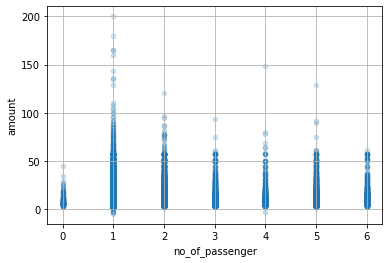

In [13]:
TFdataset_rindxed.plot(kind='scatter',x="no_of_passenger",y="amount",alpha=0.2,grid=True)

we learn that the price for one passenger is higher.

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter= StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
start_splits=[]
for train_index,test_index in splitter.split(TFdataset_rindxed,TFdataset_rindxed["no_of_passenger"]):
    strat_train_set_n= TFdataset_rindxed.iloc[train_index]
    strat_test_set_n= TFdataset_rindxed.iloc[test_index]
    start_splits.append([strat_train_set_n,strat_test_set_n])

In [15]:
strat_train_set,strat_test_set=start_splits[0]
strat_train_set.head(10)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
unique_id,,,,,,,
57:00.0,8.1,2011-12-16 15:57:00 UTC,-73.989790,40.756685,-73.976273,40.751557,3
12:00.0,7.5,2014-09-09 06:12:00 UTC,-74.000360,40.760690,-73.973680,40.762430,1
28:00.0,5.5,2013-12-26 15:28:00 UTC,-73.979285,40.784557,-73.982428,40.775402,1
30:00.0,5.3,2010-11-23 12:30:00 UTC,-73.975268,40.741393,-73.983228,40.742495,2
57:23.0,17.5,2012-12-11 05:57:23 UTC,-73.977700,40.726002,-73.959811,40.733050,1
30:57.0,18.0,2012-11-18 02:30:57 UTC,-74.011661,40.703504,-73.985557,40.760267,1
33:00.0,7.3,2011-09-24 09:33:00 UTC,-73.998308,40.745167,-73.974108,40.756850,1
52:00.0,6.9,2010-10-23 03:52:00 UTC,-74.000021,40.733022,-73.988144,40.758839,1
42:00.0,5.7,2009-02-24 14:42:00 UTC,-73.950773,40.770650,-73.948443,40.781470,1


In [16]:
strat_test_set.head(10)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
unique_id,,,,,,,
14:00.0,9.7,2010-07-19 20:14:00 UTC,-73.978288,40.729827,-74.006510,40.716780,2
04:53.0,3.7,2010-01-23 20:04:53 UTC,-73.973453,40.791723,-73.969273,40.797883,1
26:38.0,10.0,2015-04-29 07:26:38 UTC,-73.953621,40.779240,-73.973572,40.762760,1
22:55.0,11.0,2012-11-14 11:22:55 UTC,-73.969956,40.797456,-73.975137,40.783678,1
16:35.0,19.0,2014-11-07 09:16:35 UTC,-73.997744,40.736012,-73.978212,40.751707,1
36:11.0,4.9,2011-03-21 10:36:11 UTC,-73.994021,40.735438,-73.997125,40.724946,1
52:31.0,5.5,2012-09-15 07:52:31 UTC,-73.982268,40.778930,-73.992240,40.770818,1
14:50.0,12.0,2015-06-01 20:14:50 UTC,-73.983070,40.762485,-74.003448,40.720448,1
34:56.0,9.7,2009-10-01 18:34:56 UTC,-73.992105,40.723999,-73.991450,40.749425,1


In [17]:
TFdataset_rindxed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 26:21.0 to 13:14.0
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   date_time_of_pickup   50000 non-null  object 
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [18]:
TFdataset_rindxed["date_time_of_pickup"].value_counts()

2014-05-30 23:38:00 UTC    3
2011-09-03 01:30:00 UTC    3
2012-06-28 20:54:00 UTC    3
2011-02-11 13:19:00 UTC    3
2013-07-18 18:14:00 UTC    2
                          ..
2012-07-17 17:11:16 UTC    1
2010-11-24 12:46:52 UTC    1
2009-08-02 14:46:14 UTC    1
2013-08-16 23:29:00 UTC    1
2012-09-12 11:37:00 UTC    1
Name: date_time_of_pickup, Length: 49555, dtype: int64

In [19]:
TFdataset_rindxed_cat= strat_train_set["date_time_of_pickup"]
TFdataset_rindxed_cat.head(10)

unique_id
57:00.0    2011-12-16 15:57:00 UTC
12:00.0    2014-09-09 06:12:00 UTC
28:00.0    2013-12-26 15:28:00 UTC
30:00.0    2010-11-23 12:30:00 UTC
57:23.0    2012-12-11 05:57:23 UTC
30:57.0    2012-11-18 02:30:57 UTC
33:00.0    2011-09-24 09:33:00 UTC
52:00.0    2010-10-23 03:52:00 UTC
42:00.0    2009-02-24 14:42:00 UTC
25:03.0    2014-09-17 23:25:03 UTC
Name: date_time_of_pickup, dtype: object

In [20]:
TFdataset_rindxed_num=strat_train_set.select_dtypes(include=np.number)
TFdataset_rindxed_num.head(10)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
unique_id,,,,,,
57:00.0,8.1,-73.989790,40.756685,-73.976273,40.751557,3
12:00.0,7.5,-74.000360,40.760690,-73.973680,40.762430,1
28:00.0,5.5,-73.979285,40.784557,-73.982428,40.775402,1
30:00.0,5.3,-73.975268,40.741393,-73.983228,40.742495,2
57:23.0,17.5,-73.977700,40.726002,-73.959811,40.733050,1
30:57.0,18.0,-74.011661,40.703504,-73.985557,40.760267,1
33:00.0,7.3,-73.998308,40.745167,-73.974108,40.756850,1
52:00.0,6.9,-74.000021,40.733022,-73.988144,40.758839,1
42:00.0,5.7,-73.950773,40.770650,-73.948443,40.781470,1


In [21]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
TFdataset_rindxed_standardised= scaler.fit_transform(TFdataset_rindxed_num)
TFdataset_rindxed_standardised


array([[-0.33679979, -0.14211891,  0.13051612, -0.14118036,  0.1371229 ,
         1.0334465 ],
       [-0.39848054, -0.14313791,  0.1311558 , -0.14093082,  0.13893345,
        -0.5180129 ],
       [-0.60408302, -0.14110618,  0.13496784, -0.14177271,  0.14109352,
        -0.5180129 ],
       ...,
       [ 0.16692629, -0.14216518,  0.12879865, -0.14124311,  0.14267044,
        -0.5180129 ],
       [-0.54240228, -0.14125213,  0.13157187, -0.14245437,  0.13737184,
         1.0334465 ],
       [-0.75828489, -0.14270476,  0.12985679, -0.14374368,  0.13774817,
         2.5849059 ]])

In [22]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler= MinMaxScaler(feature_range=(-1,1))
TFdataset_rindxed_minmaxscaled= min_max_scaler.fit_transform(TFdataset_rindxed_num)
TFdataset_rindxed_minmaxscaled


array([[-0.89064039, -0.97531897, -0.5168767 , -0.82984032,  0.9546292 ,
         0.        ],
       [-0.89655172, -0.97550088, -0.51685984, -0.829799  ,  0.95481441,
        -0.66666667],
       [-0.91625616, -0.97513817, -0.51675937, -0.82993841,  0.95503537,
        -0.66666667],
       ...,
       [-0.84236453, -0.97532723, -0.51692197, -0.82985071,  0.95519667,
        -0.66666667],
       [-0.91034483, -0.97516423, -0.51684888, -0.83005128,  0.95465467,
         0.        ],
       [-0.93103448, -0.97542356, -0.51689408, -0.83026477,  0.95469316,
         0.66666667]])

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer,make_column_selector
num_pipeline= make_pipeline(SimpleImputer(strategy="median"),StandardScaler())
cat_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"))
preprocessing= make_column_transformer((num_pipeline,make_column_selector(dtype_include=np.number)),(cat_pipeline,make_column_selector(dtype_include=object)))
tfdataset_prepared= preprocessing.fit_transform(strat_train_set)


In [32]:
tfdataset_prepared_1= pd.DataFrame(tfdataset_prepared)
tfdataset_prepared_1.head(10)

,0,1,2,3,4,5,6
0,-0.3368,-0.142119,0.130516,-0.14118,0.137123,1.033447,2011-12-16 15:57:00 UTC
1,-0.398481,-0.143138,0.131156,-0.140931,0.138933,-0.518013,2014-09-09 06:12:00 UTC
2,-0.604083,-0.141106,0.134968,-0.141773,0.141094,-0.518013,2013-12-26 15:28:00 UTC
3,-0.624643,-0.140719,0.128074,-0.14185,0.135614,0.257717,2010-11-23 12:30:00 UTC
4,0.629532,-0.140953,0.125615,-0.139596,0.134041,-0.518013,2012-12-11 05:57:23 UTC
5,0.680933,-0.144227,0.122022,-0.142074,0.138573,-0.518013,2012-11-18 02:30:57 UTC
6,-0.419041,-0.14294,0.128676,-0.140972,0.138004,-0.518013,2011-09-24 09:33:00 UTC
7,-0.460161,-0.143105,0.126737,-0.142323,0.138335,-0.518013,2010-10-23 03:52:00 UTC
8,-0.583523,-0.138357,0.132747,-0.138502,0.142104,-0.518013,2009-02-24 14:42:00 UTC
9,-0.090077,-0.140228,0.130944,-0.140594,0.138422,-0.518013,2014-09-17 23:25:03 UTC


In [27]:
tfdataset_prepared_dtafram=tfdataset_prepared_1.copy()

In [25]:
tfdataset_labels= strat_train_set["amount"]

In [35]:
tfdatase_droped_dtop=tfdataset_prepared_1.drop(columns=6)
tfdatase_droped_dtop.head(10)

,0,1,2,3,4,5
0,-0.3368,-0.142119,0.130516,-0.14118,0.137123,1.033447
1,-0.398481,-0.143138,0.131156,-0.140931,0.138933,-0.518013
2,-0.604083,-0.141106,0.134968,-0.141773,0.141094,-0.518013
3,-0.624643,-0.140719,0.128074,-0.14185,0.135614,0.257717
4,0.629532,-0.140953,0.125615,-0.139596,0.134041,-0.518013
5,0.680933,-0.144227,0.122022,-0.142074,0.138573,-0.518013
6,-0.419041,-0.14294,0.128676,-0.140972,0.138004,-0.518013
7,-0.460161,-0.143105,0.126737,-0.142323,0.138335,-0.518013
8,-0.583523,-0.138357,0.132747,-0.138502,0.142104,-0.518013
9,-0.090077,-0.140228,0.130944,-0.140594,0.138422,-0.518013


In [36]:
from sklearn.linear_model import LinearRegression
lin_reg= make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(tfdatase_droped_dtop,tfdataset_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020F4B523430>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020F4B052850>)])

In [40]:
tfdataset_prediction= lin_reg.predict(tfdatase_droped_dtop)
tfdataset_prediction[:5]

array([ 8.1,  7.5,  5.5,  5.3, 17.5])

In [42]:
tfdataset_labels.iloc[:5].values

array([ 8.1,  7.5,  5.5,  5.3, 17.5])

In [43]:
from sklearn.metrics import mean_squared_error
lin_rmse= mean_squared_error(tfdataset_labels,tfdataset_prediction,squared=False)

In [44]:
lin_rmse

3.5793945440583474e-14